In [42]:
#倒入数据包
import numpy as np
import math
from math import exp, sqrt, log
from scipy import stats

In [43]:
#BSM formula
def bsm_call_value(S0, K, T, r, sigma):
    S0 = float(S0)
    d1 = (np.log(S0/K) + (r +0.5 * sigma**2) * T)/(sigma*np.sqrt(T))
    d2 =(np.log(S0/K) +(r-0.5*sigma**2) * T)/ (sigma*np.sqrt(T))
    value = (S0 * stats.norm.cdf(d1, 0, 1) -K * np.exp(-r *T) *stats.norm.cdf(d2,0,1))
    return value

In [44]:
def bsm_vega(S0, K, T, r, sigma):
    S0 = float(S0)
    d1 = (np.log(S0/K)) +(r + 0.5*sigma**2)*T /(sigma*sqrt(T))
    vega = S0 * stats.norm.cdf(d1, 0,1)*np.sqrt(T)
    return vega

In [45]:
def bsm_call_imp_vol(S0, K, T, r, C0, sigma_est, it =100):
    for i in range(it):
        sigma_est -=((bsm_call_value(S0, K, T, r, sigma_est)- C0)
                            / bsm_vega(S0, K, T, r, sigma_est))
        return sigma_est

In [46]:
S0 = 1
K =2
T = 2
r = 0.01
sigma = 0.1
C0 = 1
bsm_call_imp_vol(S0, K, T, r, C0, sigma, it =2000)

2.3429827889481474

In [47]:
#Monte Carlo Simulation 
S0 = 100
K = 105
T = 1.0
r = 0.05
sigma = 0.2
bsm_call_value(S0, K, T, r, sigma)

8.021352235143176

In [48]:
#纯python版计算
seed(20000)
t0 = time()
# 参数设定
S0 = 100.
K = 105.
T = 1.
r = 0.05
sigma = 0.2
M = 50 # 时间步长
dt = T / M
I = 250000
S = []

# M步循环
for i in range(I):
    path = []
    for t in range(M+1):
        if t == 0 :
            path.append(S0)
        else:
            z = gauss(0, 1)
            St = path[t-1] * exp((r - 0.5 * sigma **2) * dt 
                                + sigma * sqrt(dt) * z)
            path.append(St)
    S.append(path)
C0 = exp(-r * T) * sum([max(path[-1] - K, 0) for path in S])/ I
print(f'欧式期权定价 {C0}.')
print(f'共计花费时间 {np.round(time()-t0,1) }s.')

欧式期权定价 7.9990448881765825.
共计花费时间 23.5s.


In [49]:
#通过Numpy 向量优化计算速度
from time import time
from random import gauss, seed

In [50]:
np.random.seed(20000)
t0 = time()

In [51]:
S0 = 100; K =105; T =1; r=0.05; sigma = 0.2; M =50; dt=T/M; I =250000
S = S0 * np.exp(np.cumsum((r-0.5*sigma**2)*dt + sigma * math.sqrt(dt)
                       * np.random.standard_normal((M+1, I)), axis=0
                      ))
S[0] = S0
C0 = math.exp(-r*T) * np.sum(np.maximum(S[-1]-K, 0))/I

print(f'欧式期权定价 {C0}.')
print(f'共计花费时间 {np.round(time()-t0,1) }s.')

欧式期权定价 8.165807966259603.
共计花费时间 1.5s.


In [52]:
#递增法计算
S0 = 100; K=105; T=1.; r=0.05; sigma=0.2
S = S0 * np.exp(np.cumsum((r-0.5*sigma**2)*dt + sigma * math.sqrt(dt)
                       * np.random.standard_normal((M+1, I)), axis=0
                      ))
S[0] = S0
C0 = math.exp(-r*T) * np.sum(np.maximum(S[-1]-K, 0))/I

print(f'欧式期权定价 {C0}.')
print(f'共计花费时间 {np.round(time()-t0,1) }s.')

欧式期权定价 8.195126894395619.
共计花费时间 2.5s.


Text(0, 0.5, 'index level')

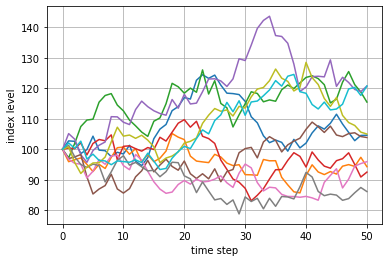

In [53]:
#路径可视化
import matplotlib.pyplot as plt
plt.plot(S [:, : 10])
plt.grid(True)
plt.xlabel('time step')
plt.ylabel('index level')

Text(0, 0.5, 'frequency')

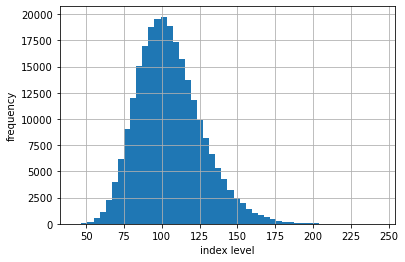

In [54]:
plt.hist(S[-1], bins=50)
plt.grid(True)
plt.xlabel('index level')
plt.ylabel('frequency')